In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as scp 


In [2]:
# importação e visualização da base de dados 
df = pd.read_csv("events.csv")
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [3]:
# exclusão da string contida no meio da data e hora 
df["event_time"] = df["event_time"].str.removesuffix("UTC")

# convewrsão para tipo datetime
df["event_time"] = pd.to_datetime(df["event_time"])

# separação de algumas variáveis de interesse para estudo prévio 
df["year"] = df["event_time"].dt.year
df["month"] = df["event_time"].dt.month
df["hour"] = df["event_time"].dt.time
df["hour_"] = df["event_time"].dt.hour
df["date"] = df["event_time"].dt.date

In [4]:
# algumas linhas estão com as variáveis "category_code" e "brand" como NaN, seria interessante verificar quantas estão comprometidas 
lista = list()
for i in df.columns:
    lista.append(df[df[i].isna() == True].index)
    print(f"a variável {i} possúi {len(df[df[i].isna() == True].index)} linhas como NaN")


a variável event_time possúi 0 linhas como NaN
a variável event_type possúi 0 linhas como NaN
a variável product_id possúi 0 linhas como NaN
a variável category_id possúi 0 linhas como NaN
a variável category_code possúi 236219 linhas como NaN
a variável brand possúi 212364 linhas como NaN
a variável price possúi 0 linhas como NaN
a variável user_id possúi 0 linhas como NaN
a variável user_session possúi 165 linhas como NaN
a variável year possúi 0 linhas como NaN
a variável month possúi 0 linhas como NaN
a variável hour possúi 0 linhas como NaN
a variável hour_ possúi 0 linhas como NaN
a variável date possúi 0 linhas como NaN


In [5]:
# as únicas com valores NaN são "category code", "brand" e "user_session". Será que são coincidentes ? 
# verificação se as linhas com NaN coincidem para as variáveis 

drop = df[(df["category_code"].isna()==True)|(df["brand"].isna()==True)|(df["user_session"].isna()==True)].index

# drop dos valores NaN
df.drop(drop, axis = 0, inplace = True)

In [6]:
teste = df.groupby(by = ["date","year","month","hour_","category_code","product_id","user_id", "event_type","brand"], as_index= False).agg(event = ("event_type", "count"), value = ("price", "sum")).copy()
#teste.sort_values(by = "event", axis = 0, ascending = False, inplace= True)

In [14]:
# responder as perguntas:
# quais os produtos mais acessados ?
# quais os produtos mais comprados ?
# qual o mês de maior venda ?
# qual o mês de maior acesso ?
# qual o horário de maior acesso ?
# tem correlação entre acesso e venda ? 


In [7]:
# Produtos mais acessados 
produtos_acessados = teste[teste["event_type"] == "view"].copy()
produtos_acessados = produtos_acessados.groupby(by = ["product_id"], as_index = False).agg( access = ("event", "sum"))
produtos_acessados["access(%)"] = (produtos_acessados["access"]/(produtos_acessados["access"].sum()))*100
produtos_acessados.sort_values(by = "access(%)", ascending = False, inplace = True)
produtos_acessados["access(%ac)"] = np.cumsum(produtos_acessados["access(%)"])
# data = produtos_acessados[produtos_acessados["access(%ac)"] < 10].copy()

# quantidade de produtos por representatividade de views 
passo  = np.arange(10,110,10)

repres = list()
for i in passo:
    repres.append(produtos_acessados[produtos_acessados["access(%ac)"] < i]["product_id"])

repres_curve_a = pd.DataFrame({"% access": passo, "products": [len(i) for i in repres]})
repres_curve_a

,% access,products
0,10,13
1,20,52
2,30,138
3,40,297
4,50,585
5,60,1082
6,70,2004
7,80,3741
8,90,7459
9,100,24255


In [ ]:
# Produtos mais vendidos em quantidade de vendas 
produtos_comprados = teste[teste["event_type"] == "purchase"].copy()
produtos_comprados = produtos_comprados.groupby(by = ["product_id"], as_index = False).agg( purchase = ("event", "sum"))
produtos_comprados["purchase(%)"] = (produtos_comprados["purchase"]/(produtos_comprados["purchase"].sum()))*100
produtos_comprados.sort_values(by = "purchase(%)", ascending = False, inplace = True)
produtos_comprados["purchase(%ac)"] = np.cumsum(produtos_comprados["purchase(%)"])

passo  = np.arange(10,110,10)

repres = list()
for i in passo:
    repres.append(produtos_comprados[produtos_comprados["purchase(%ac)"] < i]["product_id"])

repres_curve_p = pd.DataFrame({"% purchase": passo, "products": [len(i) for i in repres]})
repres_curve_p

,% purchase,products
0,10,6
1,20,19
2,30,42
3,40,78
4,50,139
5,60,243
6,70,431
7,80,777
8,90,1446
9,100,3210


<Axes: xlabel='month', ylabel='event'>

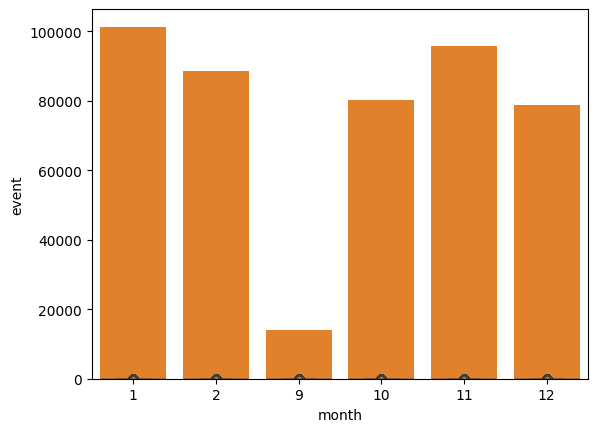

In [9]:
# meses de maior acesso
acessos = teste[teste["event_type"] == "view"].copy()
sns.boxplot(data = acessos, x = "month", y = "event")
meses = acessos.groupby(by = "month", as_index = False).agg(access = ("event", "sum"))
sns.barplot(data = meses, x = "month", y = "access")

<Axes: xlabel='month', ylabel='event'>

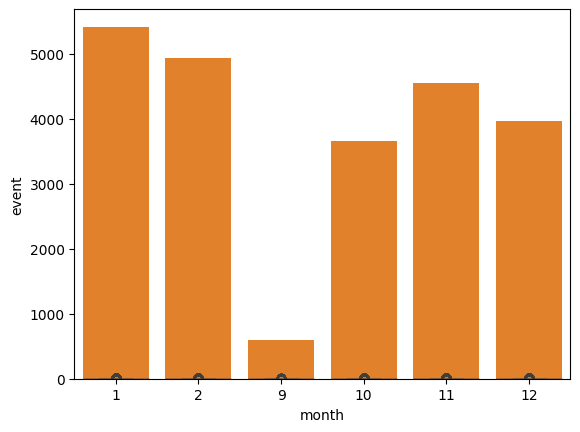

In [10]:
# meses de maior compra
compras = teste[teste["event_type"] == "purchase"].copy()
sns.boxplot(data = compras, x = "month", y = "event")
meses = compras.groupby(by = "month", as_index = False).agg(purchase = ("event", "sum"))
sns.barplot(data = meses, x = "month", y = "purchase")


<Axes: xlabel='hour_', ylabel='acess'>

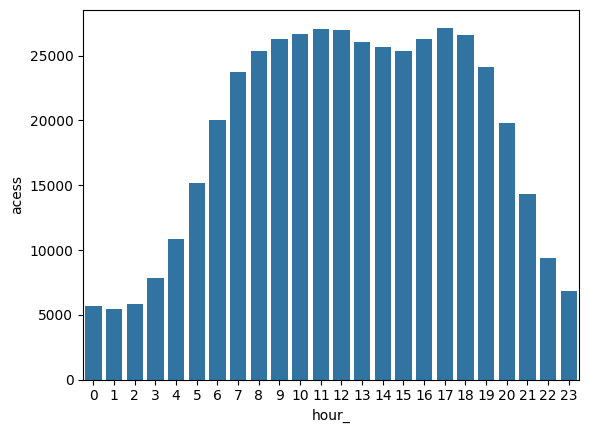

In [11]:
# horário de maior acesso
acessos = teste[teste["event_type"] == "view"].copy()
hora = acessos.groupby(by = "hour_", as_index = False).agg(acess = ("event", "sum"))
sns.barplot(data = hora, x = "hour_", y = "acess")

In [26]:
# existe correlação entre acesso e venda 

# 1 - usando a quantidade de views e de compras de cada produto para verificar correlação. 
corr = pd.crosstab(df["product_id"], df["event_type"])
corr.reset_index(inplace = True)
corr["value"] = df.groupby("product_id")["price"].mean().values
corr["cell_value"] = corr["purchase"]*corr["value"]
corr[["cart", "view", "purchase","value"]].corr()

event_type,cart,view,purchase,value
event_type,,,,
cart,1.000000,0.901860,0.969082,0.008599
view,0.901860,1.000000,0.875103,0.011374
purchase,0.969082,0.875103,1.000000,0.005389
value,0.008599,0.011374,0.005389,1.000000


In [30]:
corr1 = pd.crosstab(df["category_code"], df["event_type"])
corr1.reset_index(inplace = True)
corr1["value"] = df.groupby("category_code")["price"].mean().values
corr1["cell_value"] = corr1["purchase"]*corr1["value"]
corr1[["cart", "view", "purchase","value"]].corr()


event_type,cart,view,purchase,value
event_type,,,,
cart,1.000000,0.938128,0.989910,0.202917
view,0.938128,1.000000,0.957047,0.199291
purchase,0.989910,0.957047,1.000000,0.189489
value,0.202917,0.199291,0.189489,1.000000


In [32]:
corr1

event_type,category_code,cart,purchase,view,value,cell_value
0,accessories.bag,63,55,1821,54.124028,2976.821532
1,apparel.glove,1,0,52,11.049057,0.000000
2,appliances.environment.air_heater,26,17,761,62.324664,1059.519291
3,appliances.environment.fan,1,0,75,29.210658,0.000000
4,appliances.environment.vacuum,299,272,7850,164.072658,44627.762879
...,...,...,...,...,...,...
99,sport.bicycle,14,6,197,316.237189,1897.423134
100,stationery.battery,32,24,874,18.174581,436.189935
101,stationery.cartrige,2079,1838,23919,55.018328,101123.686322
102,stationery.paper,91,81,1611,24.800538,2008.843612
